In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

In [2]:
data = pd.read_csv('TCS_stock_history.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


 Data Preprocessing

In [3]:
 # Check for null values
print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [4]:
# Convert numeric columns if required
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

In [5]:
# Fill any remaining NaN values
data.ffill(inplace=True)

 Exploratory Data Analysis (EDA)

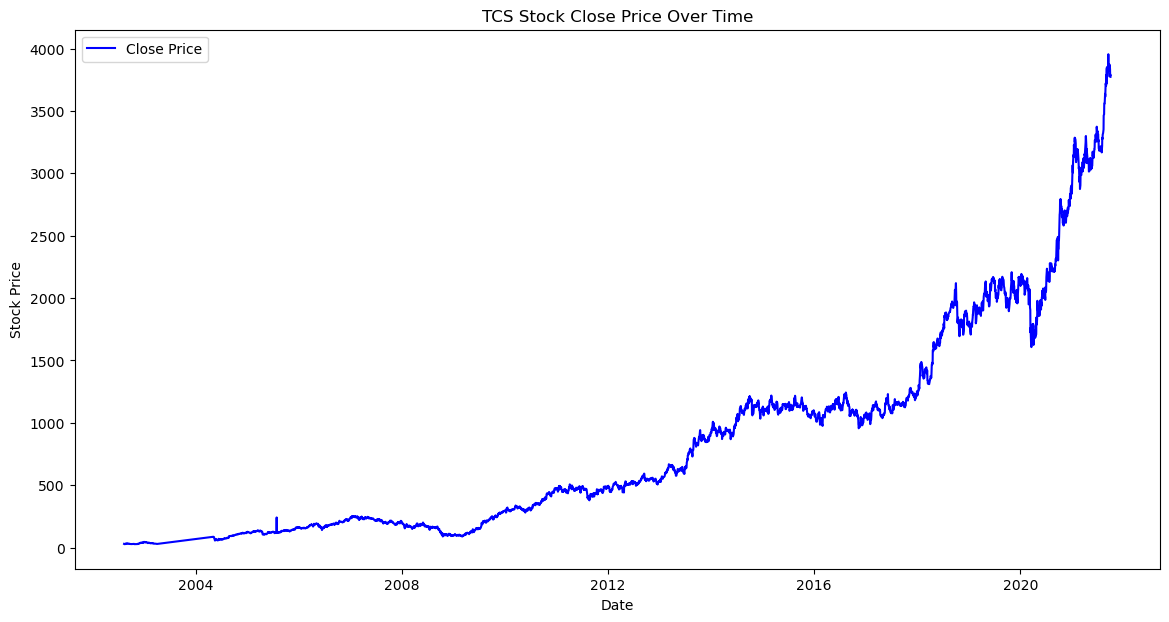

In [6]:
# Plotting Close price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue',
label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

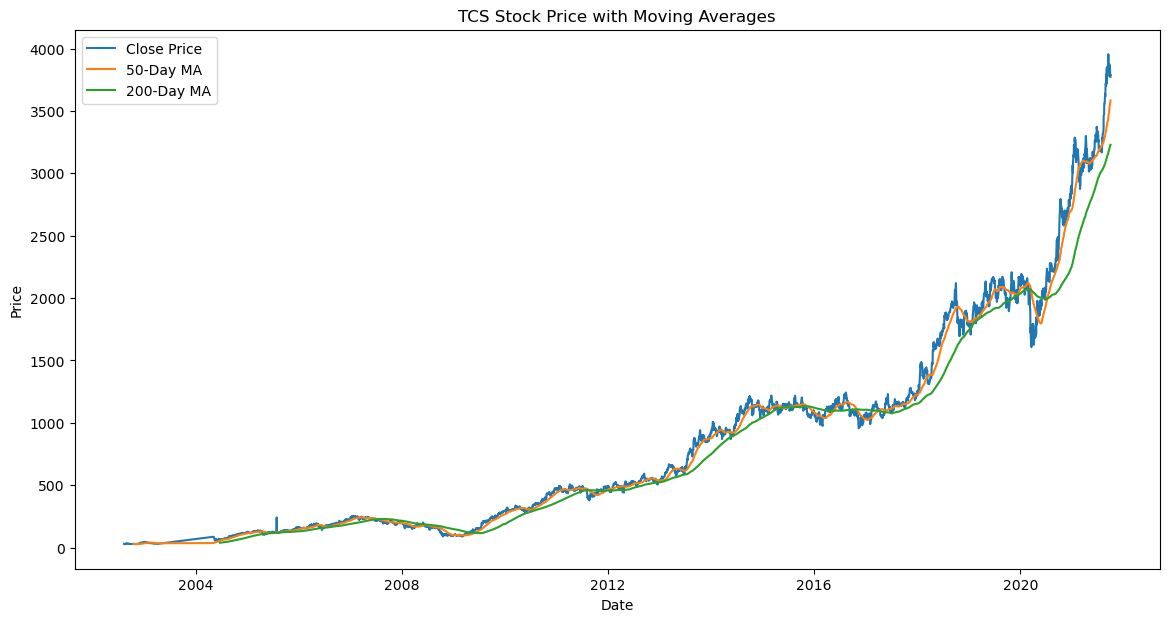

In [7]:
# Calculating 50-day and 200-day moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

 # Plot with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA50'], label='50-Day MA')
plt.plot(data['Date'], data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

 Feature Engineering

In [8]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek

 # Lag Features
data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True) # Drop rows with NaN values from shifting

 Model Building and Prediction

In [9]:
# Feature selection
X = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close','Day_of_Week', 'Month']]
y = data['Close']

In [10]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [11]:
# Linear Regression Model
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictions
y_pred = LRmodel.predict(X_test)

In [13]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 39.04992998586452
R-Squared Score: 0.9999438356582183


Visualize Model Performance

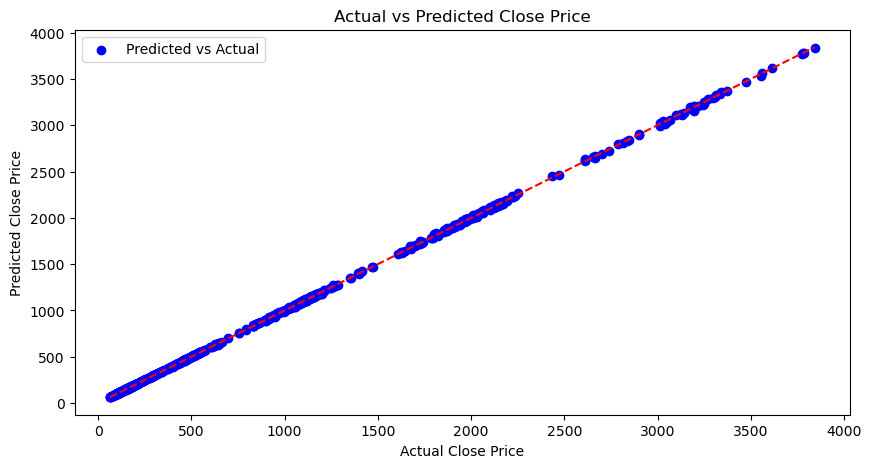

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R² Score:", r2_rf)


Random Forest MSE: 98.61311439230556
Random Forest R² Score: 0.9998581677185365


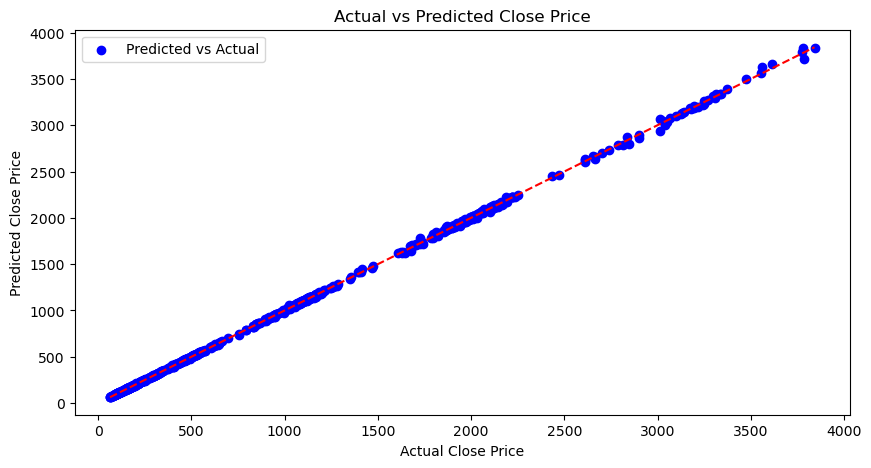

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [17]:
!pip install tensorflow

In [18]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm

In [19]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Year,Month,Day,Day_of_Week,Prev_Close
199,2004-06-21,66.919920,68.407029,64.540547,65.451401,49328,0.0,0.0,53.539858,38.361673,2004,6,21,0,66.157806
200,2004-06-22,65.432855,65.618744,63.573967,63.927155,20064,0.0,0.0,54.208315,38.533714,2004,6,22,1,65.451401
201,2004-06-23,64.596334,65.061056,61.584935,62.681683,22912,0.0,0.0,54.837176,38.701525,2004,6,23,2,63.927155
202,2004-06-24,63.192893,64.317518,61.919554,63.722672,21592,0.0,0.0,55.496152,38.884579,2004,6,24,3,62.681683
203,2004-06-25,63.202185,65.061073,63.202185,63.722672,60280,0.0,0.0,56.147134,39.067632,2004,6,25,4,63.722672


In [20]:
 data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'MA50', 'MA200', 'Year', 'Month', 'Day', 'Day_of_Week',
       'Prev_Close'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4264 entries, 199 to 4462
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4264 non-null   datetime64[ns]
 1   Open          4264 non-null   float64       
 2   High          4264 non-null   float64       
 3   Low           4264 non-null   float64       
 4   Close         4264 non-null   float64       
 5   Volume        4264 non-null   int64         
 6   Dividends     4264 non-null   float64       
 7   Stock Splits  4264 non-null   float64       
 8   MA50          4264 non-null   float64       
 9   MA200         4264 non-null   float64       
 10  Year          4264 non-null   int32         
 11  Month         4264 non-null   int32         
 12  Day           4264 non-null   int32         
 13  Day_of_Week   4264 non-null   int32         
 14  Prev_Close    4264 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int32(4

In [22]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

data.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Year,Month,Day,Day_of_Week,Prev_Close
count,4264,4264.000000,4264.000000,4264.000000,4264.000000,4.264000e+03,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000
mean,2013-02-01 09:45:55.722326528,905.599844,915.747017,894.886097,905.194542,3.659627e+06,0.074871,0.001407,884.114760,827.939710,2012.587477,6.530957,15.798311,1.992026,904.325160
min,2004-06-21 00:00:00,58.573539,64.131611,58.043755,62.681683,0.000000e+00,0.000000,0.000000,53.539858,38.361673,2004.000000,1.000000,1.000000,0.000000,62.681683
25%,2008-09-23 18:00:00,207.184796,210.288883,203.499755,206.532475,1.939590e+06,0.000000,0.000000,201.593277,192.689310,2008.000000,4.000000,8.000000,1.000000,206.257469
50%,2013-01-31 12:00:00,575.692327,583.616846,571.807539,575.650360,2.844132e+06,0.000000,0.000000,552.379172,530.090287,2013.000000,7.000000,16.000000,2.000000,575.356354
75%,2017-06-05 06:00:00,1166.164771,1179.365029,1153.324126,1166.532288,4.363679e+06,0.000000,0.000000,1146.773688,1125.963538,2017.000000,9.000000,23.000000,3.000000,1166.312744
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000,3584.287983,3227.919528,2021.000000,12.000000,31.000000,4.000000,3954.550049
std,NaN,829.066863,837.400194,820.432816,828.765807,3.285622e+06,0.987550,0.053037,801.073264,738.556791,5.018459,3.413140,8.776161,1.412199,827.700215


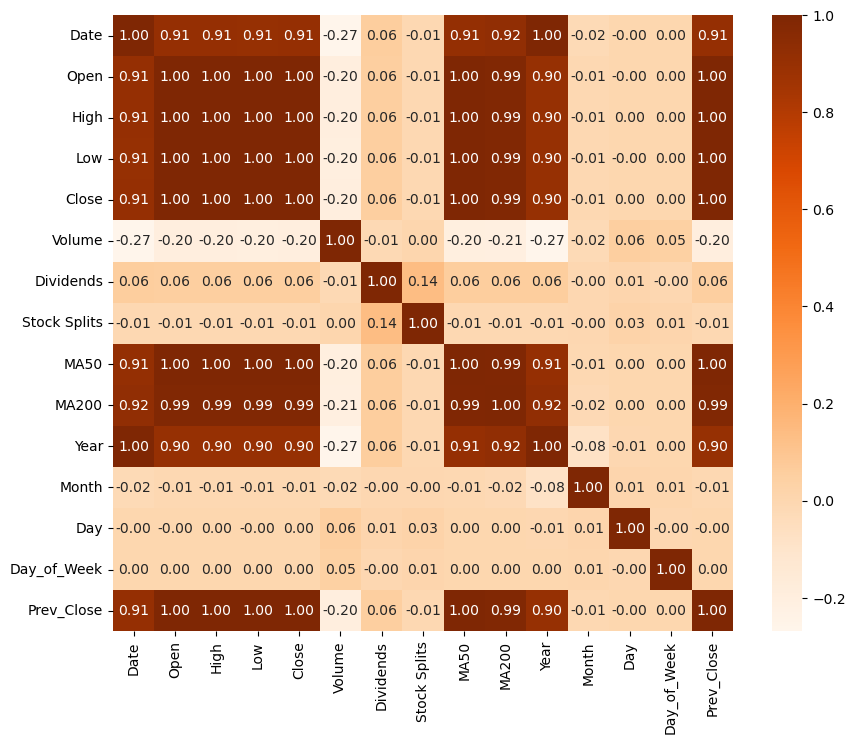

In [23]:
correl=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correl,annot=True,cmap= "Oranges",fmt=".2f")
plt.show()

In [24]:
# Correlation of features with the target variable (Close Price)
correlation_with_close= data.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999910
Low             0.999896
Open            0.999776
Prev_Close      0.999729
MA50            0.996858
MA200           0.989252
Date            0.906053
Year            0.904005
Dividends       0.058102
Day_of_Week     0.000202
Day             0.000146
Stock Splits   -0.008033
Month          -0.009692
Volume         -0.198311
Name: Close, dtype: float64


 Time series of stock prices

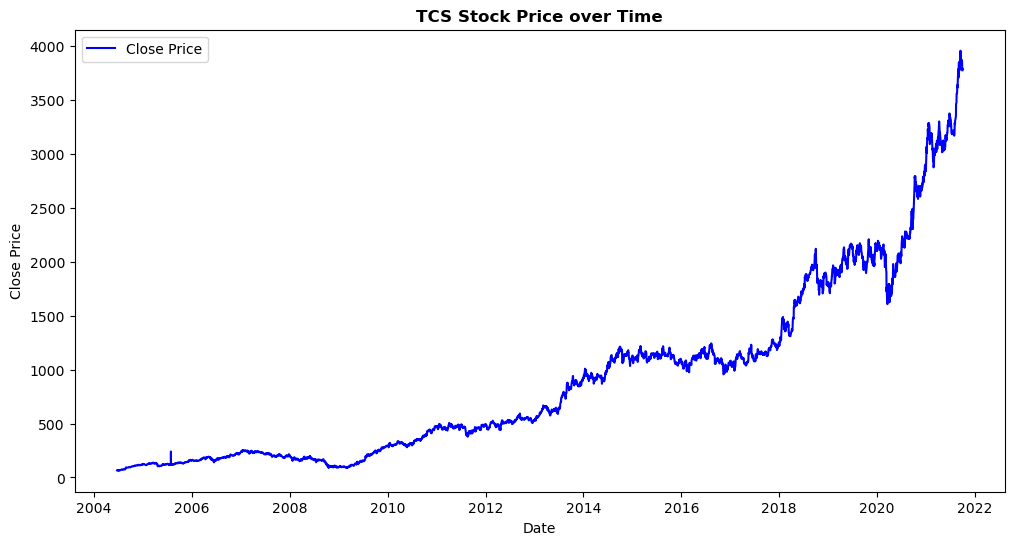

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price',color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

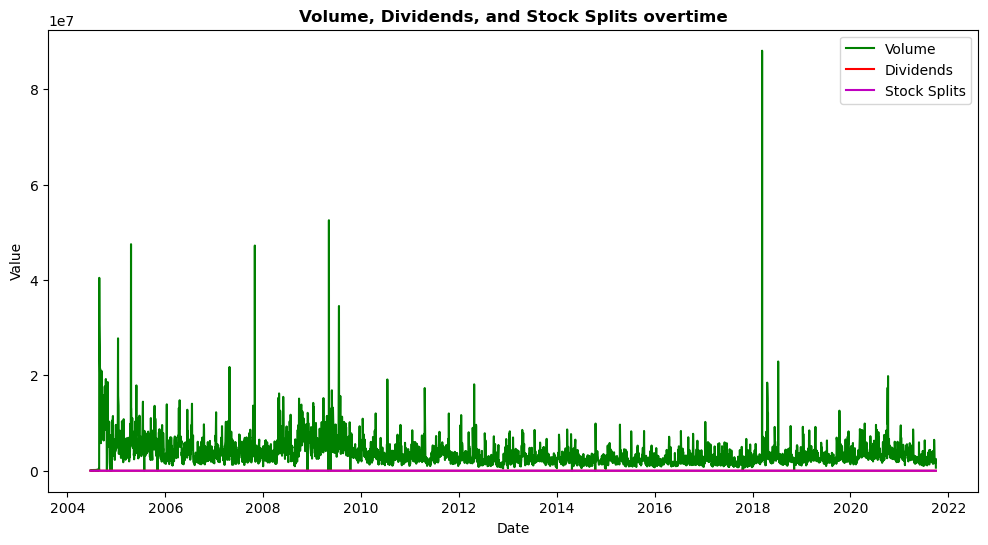

In [26]:
#Volume, Dividends, Stock Splits
plt.figure(figsize=(12, 6))

plt.plot(data['Date'], data['Volume'], label='Volume', color='g')
plt.plot(data['Date'], data['Dividends'], label='Dividends',color='r')
plt.plot(data['Date'], data['Stock Splits'], label='Stock Splits',color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits overtime',weight = "bold")
plt.legend()
plt.show()

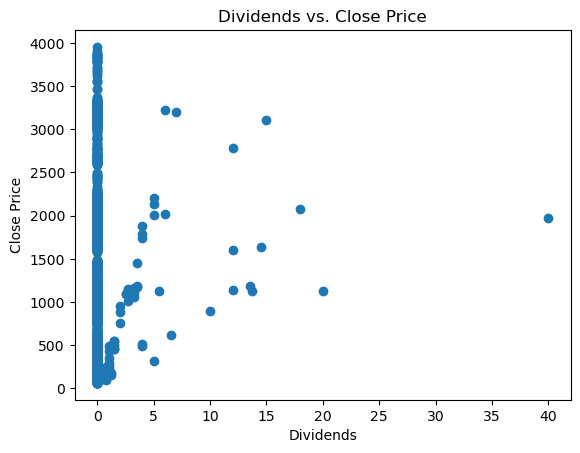

In [27]:
# Dividends vs. Close Price
plt.scatter(data['Dividends'], data['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

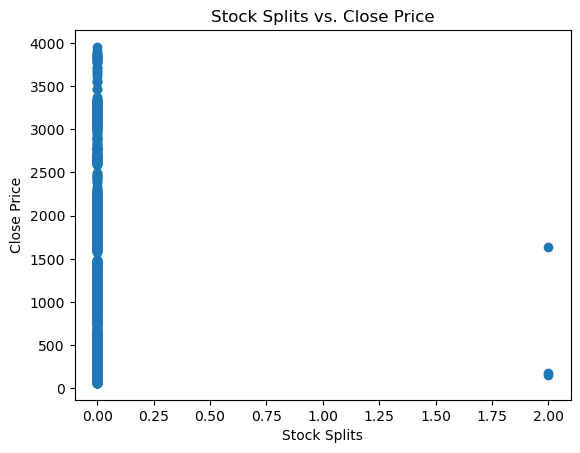

In [28]:
# Stock Splits vs. Close Price
plt.scatter(data['Stock Splits'], data['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

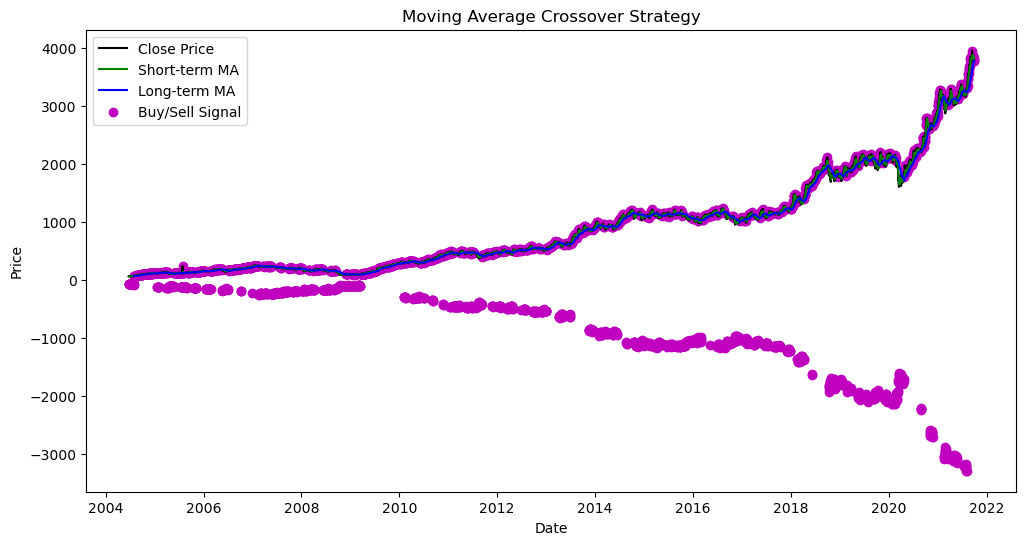

In [29]:
 #Moving Average Crossover Strategy
data['Short_MA'] = data['Close'].rolling(window=5).mean()
data['Long_MA'] = data['Close'].rolling(window=30).mean()

 # Creating a trading signals based on moving average crossovers
data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1,-1)
# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price',color='k')
plt.plot(data['Date'], data['Short_MA'], label='Short-term MA', color='g')
plt.plot(data['Date'], data['Long_MA'], label='Long-term MA',color='b')
plt.scatter(data['Date'], data['Close'] * data['Signal'],label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

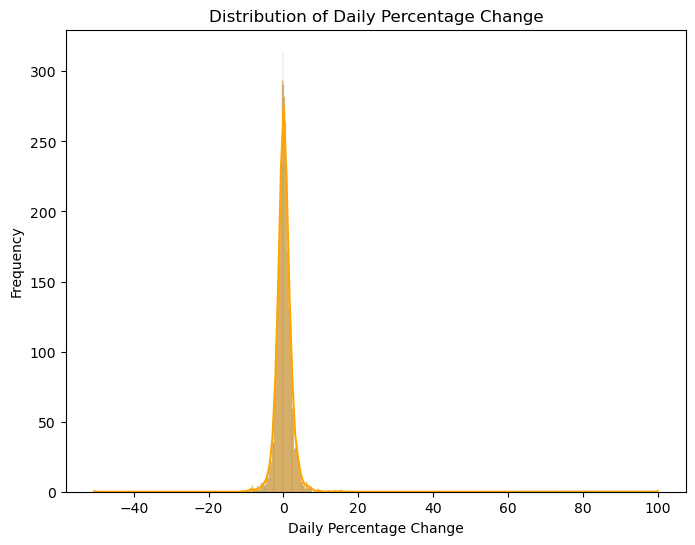

In [30]:
#Daily Price Change
data['Daily_Price_Change'] = data['Close'].pct_change() * 100

# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(data['Daily_Price_Change'].dropna(), kde=True,color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()